<a href="https://colab.research.google.com/github/LuFernandez/PASA/blob/master/informe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtrado óptimo

Procesamiento Adaptativo de Señales Aleatorias

© 2019 Parra, Rocío

© 2019 Fernandez, Lucero Guadalupe

In [0]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


##1. Cargamos datos

###Muestras

In [3]:
#cargo datos
fs_music, music = wavfile.read('lorde.wav')
fs_voice, voice = wavfile.read('sofunny.wav')
fs_square, square = wavfile.read('cuadrada.wav')
fs_lin, lin = wavfile.read('sweeplin.wav')
fs_log, log = wavfile.read('sweeplog.wav')
fs_noise, noise = wavfile.read('ruido.wav')

#vectores de tiempo
t_music = np.linspace(0,len(music)/fs_music, len(music))
t_voice = np.linspace(0,len(voice)/fs_voice, len(voice))
t_square = np.linspace(0,len(square)/fs_square, len(square))
t_lin = np.linspace(0,len(lin)/fs_lin, len(lin))
t_log = np.linspace(0,len(log)/fs_log, len(log))
t_noise = np.linspace(0,len(noise)/fs_noise, len(noise))

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


###Grabaciones

In [0]:
#cargo datos
fs_music_r, music_r = wavfile.read('grab-lorde.wav')
fs_voice_r, voice_r = wavfile.read('grab-sofunny.wav')
fs_square_r, square_r = wavfile.read('grab-cuadrada.wav')
fs_lin_r, lin_r = wavfile.read('grab-sweeplin.wav')
fs_log_r, log_r = wavfile.read('grab-sweeplog.wav')
fs_noise_r, noise_r = wavfile.read('grab-ruido.wav')

#vectores de tiempo
t_music_r = np.linspace(0,len(music_r)/fs_music_r, len(music_r))
t_voice_r = np.linspace(0,len(voice_r)/fs_voice_r, len(voice_r))
t_square_r = np.linspace(0,len(square_r)/fs_square_r, len(square_r))
t_lin_r = np.linspace(0,len(lin_r)/fs_lin_r, len(lin_r))
t_log_r = np.linspace(0,len(log_r)/fs_log_r, len(log_r))
t_noise_r = np.linspace(0,len(noise_r)/fs_noise_r, len(noise_r))

###Ploteo las grabaciones y las samples para ver que estén bien superpuestas

In [0]:
#shifts para que las señales empiecen igual
music_shift = 0.555
voice_shift = 1.174   #ok
square_shift = .3
lin_shift = 0.45
log_shift = 0.3
noise_shift = 0.7


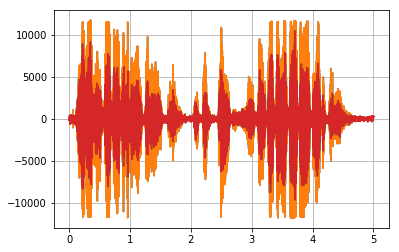

In [6]:
#musica
# plt.figure()
# plt.plot(t_music, music[:, 0])
# plt.plot(t_music_r[int(music_shift*fs_music_r):]-music_shift, music_r[int(music_shift*fs_music_r):])
#falta cortar los cuatro vectores acaaaaacasdasdasdasdasd                    a


#voz
plt.figure()
t_voice_r = t_voice_r[int(voice_shift*fs_voice_r):]-voice_shift
voice_r = voice_r[int(voice_shift*fs_voice_r):]
plt.plot(t_voice, voice)
plt.plot(t_voice_r, voice_r)


#cuadrada
# plt.figure()
# plt.plot(t_square, square)
# plt.plot(t_square_r[int(square_shift*fs_square_r):]-square_shift, square_r[int(square_shift*fs_square_r):])


#sweep lineal
# plt.figure()
# plt.plot(t_lin, lin)
# plt.plot(t_lin_r[int(lin_shift*fs_lin_r):]-lin_shift, lin_r[int(lin_shift*fs_lin_r):])


#sweep logaritmico
# plt.figure()
# plt.plot(t_log, log)
# plt.plot(t_log_r[int(log_shift*fs_log_r):]-log_shift, log_r[int(log_shift*fs_log_r):])


#ruido
# plt.figure()
# plt.plot(t_noise, noise)
# plt.plot(t_noise_r[int(noise_shift*fs_noise_r):]-noise_shift, noise_r[int(noise_shift*fs_noise_r):])


plt.grid()
plt.show()

In [0]:
R = np.cov(noise_r) #la u
p = np.convolve(noise, noise_r, mode = 'same')
sigma2 = np.var(noise_r)
sigma2d = np.var(noise)
# Rinv = linalg.inv(R)
# wo = np.dot(Rinv, p) 
Jmin = sigma2 - p.dot(wo)

In [0]:
Mmax = 6

Jmin = np.zeros(Mmax)
for M in range(1, Mmax + 1):
    wo, Jmin[M - 1] = calc_optimum_filter(sigma2d, R[0:M, 0:M], p[0:M])

plt.figure(figsize=(8, 12))
plt.plot(range(1, Mmax + 1), Jmin, marker='o')
plt.xlabel('$M$', fontsize=14)
plt.ylim(0.0)
plt.ylabel('$J_{min}(M)$', fontsize=14)
plt.show()